# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Vauwez Sam El Fareez
- **Email:** [vsefareez@gmail.com](mailto:vsefareez@gmail.com)
- **ID Dicoding:** zeerafle

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan kondisi cuaca mempengaruhi pola penyewaan sepeda sepanjang musim pada 2011-2012?
- Apa perbedaan utama antara pola penggunaan pengguna terdaftar dan kasual selama hari kerja vs akhir pekan pada tahun 2011-2012.
  - Periode waktu mana yang menunjukkan kesempatan bagus untuk mengajak pengguna kasual untuk mendaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv(os.path.join('data', 'day.csv'))
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengonfirmasi tahun yang tersedia: 2011 & 2012

In [4]:
day_df.dteday = pd.to_datetime(day_df.dteday)
print(day_df.dteday.dt.year.value_counts())
print(day_df.yr.value_counts())

dteday
2012    366
2011    365
Name: count, dtype: int64
yr
1    366
0    365
Name: count, dtype: int64


In [5]:
hour_df = pd.read_csv(os.path.join('data', 'hour.csv'))
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
hour_df.dteday = pd.to_datetime(hour_df.dteday)
print(hour_df.dteday.dt.year.value_counts())
print(hour_df.yr.value_counts())

dteday
2012    8734
2011    8645
Name: count, dtype: int64
yr
1    8734
0    8645
Name: count, dtype: int64


Konfirmasi jumlah pengguna harian merupakan aggregasi dari jumlah per jam pada hari itu

In [8]:
(day_df.cnt == hour_df.groupby('dteday').sum()['cnt'].values).all()

np.True_

**Insight:**
- Data per jam (hour.csv) memiliki 17.379 entri dan data per hari (day.csv) memiliki 731 entri
- Data tidak memiliki missing value. Entri (hari atau jam) akan kosong jika tidak ada pengguna yang menyewa sepeda.
- Data per jam merupakan versi data harian yang lebih detail dan memiliki kolom yang sama. Maka analisis akan fokus pada `hour_df`

### Assessing Data

#### Mengubah Tipe Data

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [10]:
season_mapping = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
hour_df.replace({'season': season_mapping}, inplace=True)
hour_df.season.value_counts()

season
fall      4496
summer    4409
spring    4242
winter    4232
Name: count, dtype: int64

In [11]:
hour_df.yr = hour_df.dteday.dt.year
hour_df.yr.value_counts()

yr
2012    8734
2011    8645
Name: count, dtype: int64

In [12]:
hour_df.weekday.describe()

count    17379.000000
mean         3.003683
std          2.005771
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: weekday, dtype: float64

In [13]:
hour_df.weekday = hour_df.weekday.map({0:"Monday", 1:"Tuesday", 2:"Wednesday",
                                     3:"Thursday", 4:"Friday", 5:"Saturday",
                                     6:"Sunday"})
hour_df.weekday.value_counts()

weekday
Sunday       2512
Monday       2502
Saturday     2487
Tuesday      2479
Thursday     2475
Friday       2471
Wednesday    2453
Name: count, dtype: int64

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int32         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- Kolom numerik:
  -  casual
  -  registered
  -  cnt
  -  temp_celsius
  -  atemp_celsius
  -  hum_percent
  -  windspeed_kmh 
- Kolom kategorikal (nominal):
  - season
  - yr
  - mnth
  - hr
  - holiday
  - weekday
  - workingday
  - weathersit

### Missing Values & Duplicate Entry

In [15]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value.

Untuk duplicated value sepertinya tidak relevan untuk data time series, karena setiap entri menunjukkan keadaan pada waktu itu. Kemungkinan ada duplikasi sangat kecil. Walaupun terdapat duplikasi sebaiknya tidak dihilangkan.

In [16]:
# kecualikan kolom 'instant' dan 'dteday' dari pengecekan duplikat
is_duplicate = hour_df[hour_df.columns.difference(['instant', 'dteday'])].duplicated(keep=False)
hour_df[is_duplicate]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7958,7959,2011-12-03,winter,2011,12,6,0,Sunday,0,1,0.24,0.2576,0.65,0.1045,1,10,11
8126,8127,2011-12-10,winter,2011,12,6,0,Sunday,0,1,0.24,0.2576,0.65,0.1045,1,10,11
13559,13560,2012-07-24,fall,2012,7,4,0,Wednesday,1,1,0.66,0.6061,0.83,0.0896,0,6,6
13727,13728,2012-07-31,fall,2012,7,4,0,Wednesday,1,1,0.66,0.6061,0.83,0.0896,0,6,6


### Denormalization

Kolom `temp` (temperatur), `atemp` (temperatur [terasa seperti]), `hum` (kelembaban), `windspeed` (kecepatan angin) dinormalisasi dengan nilai maksimumnya. Untuk mendapatkan analisis detail sebaiknya data di kembalikan ke nilai asalnya.

In [17]:
hour_df['temp_celsius'] = hour_df.temp * 41
hour_df['atemp_celsius'] = hour_df.atemp * 50
hour_df['hum_percent'] = hour_df.hum * 100
# kita asumsikan bahwa kecepatan angin dalam km/jam
hour_df['windspeed_kmh'] = hour_df.windspeed * 67.0

In [18]:
hour_df[['temp_celsius', 'atemp_celsius', 'hum_percent', 'windspeed_kmh']]

,temp_celsius,atemp_celsius,hum_percent,windspeed_kmh
0,9.84,14.395,81.0,0.0000
1,9.02,13.635,80.0,0.0000
2,9.02,13.635,80.0,0.0000
3,9.84,14.395,75.0,0.0000
4,9.84,14.395,75.0,0.0000
...,...,...,...,...
17374,10.66,12.880,60.0,11.0014
17375,10.66,12.880,60.0,11.0014
17376,10.66,12.880,60.0,11.0014
17377,10.66,13.635,56.0,8.9981


### Outliers

In [19]:
def detect_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [20]:
def plot_boxplot(df, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    fig.suptitle(f'Boxplot untuk kolom {",".join(columns)}', fontsize=16)

    for ax, column in zip(axes, columns):
        sns.boxplot(x=df[column], ax=ax)
        ax.set_title(column, fontsize=14)
        ax.set_xlabel(column, fontsize=12)
        ax.set_ylabel('Nilai', fontsize=12)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

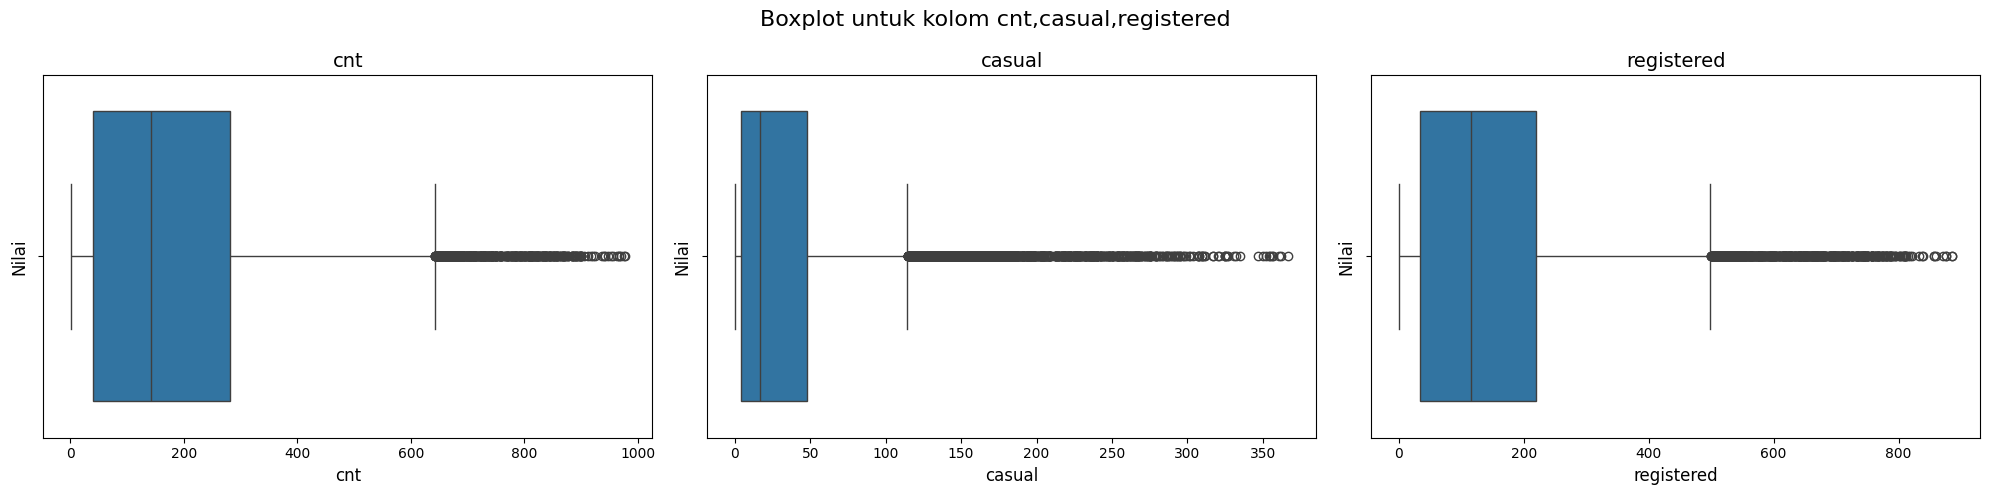

In [21]:
# boxplot untuk metrik penggunaan
plot_boxplot(hour_df, ['cnt', 'casual', 'registered'])

Dari boxplot juga terlihat right-skewed distribution dari setiap metrik penggunaan.

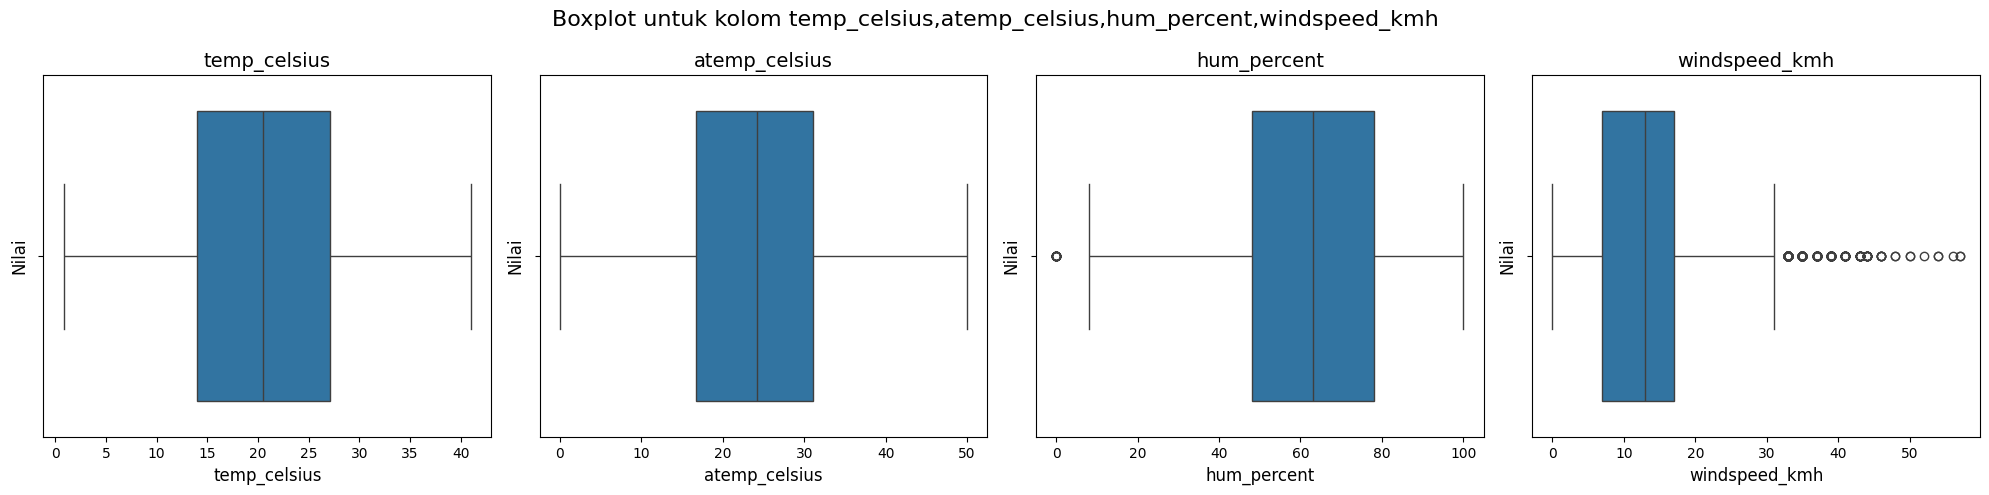

In [22]:
# boxplot untuk metrik cuaca
plot_boxplot(hour_df, ['temp_celsius', 'atemp_celsius', 'hum_percent', 'windspeed_kmh'])

Outlier pada data ini mungkin merepresentasikan hari-hari/acara-acara unik/spesial/khusus seperti hari libur, cuaca buruk, dll. daripada kesalahan input dsb., jadi sebaiknya tidak dihapus untuk analisis lebih lanjut.

**Insight:**
- Kolom diubah menjadi lebih cocok untuk analisis (season menjadi nama musim, weekday menjadi nama hari).
- Metrik cuaca di kembalikan ke nilai awal untuk analisis lebih detail.
- Metrik penggunaan (cnt, casual, registered) menunjukkan skewness positif yang berarti terdapat sesekali periode dimana penggunaan sepeda sangat tinggi.
- Tidak ada missing value
- Boxplot pengguna kasual (casual) dan terdaftar (registered) memiliki perbedaan rentang. Pengguna terdaftar memiliki rentang distribusi yang lebih lebar daripada pengguna kasual, menunjukkan perbedaan pola penggunaan.

## Exploratory Data Analysis (EDA)

### Mengeksplor Parameter Statistik

In [23]:
hour_df.drop(columns='instant').describe()

,dteday,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_celsius,atemp_celsius,hum_percent,windspeed_kmh
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2011.502561,6.537775,11.546752,0.028770,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,20.376474,23.788755,62.722884,12.736540
min,2011-01-01 00:00:00,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000
25%,2011-07-04 00:00:00,2011.000000,4.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,13.940000,16.665000,48.000000,7.001500
50%,2012-01-02 00:00:00,2012.000000,7.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,20.500000,24.240000,63.000000,12.998000
75%,2012-07-02 00:00:00,2012.000000,10.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,27.060000,31.060000,78.000000,16.997900
max,2012-12-31 00:00:00,2012.000000,12.000000,23.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,41.000000,50.000000,100.000000,56.996900
std,NaN,0.500008,3.438776,6.914405,0.167165,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,7.894801,8.592511,19.292983,8.196795


Text(0.5, 0.98, 'Distribusi Metrik Penggunaan dan Cuaca')

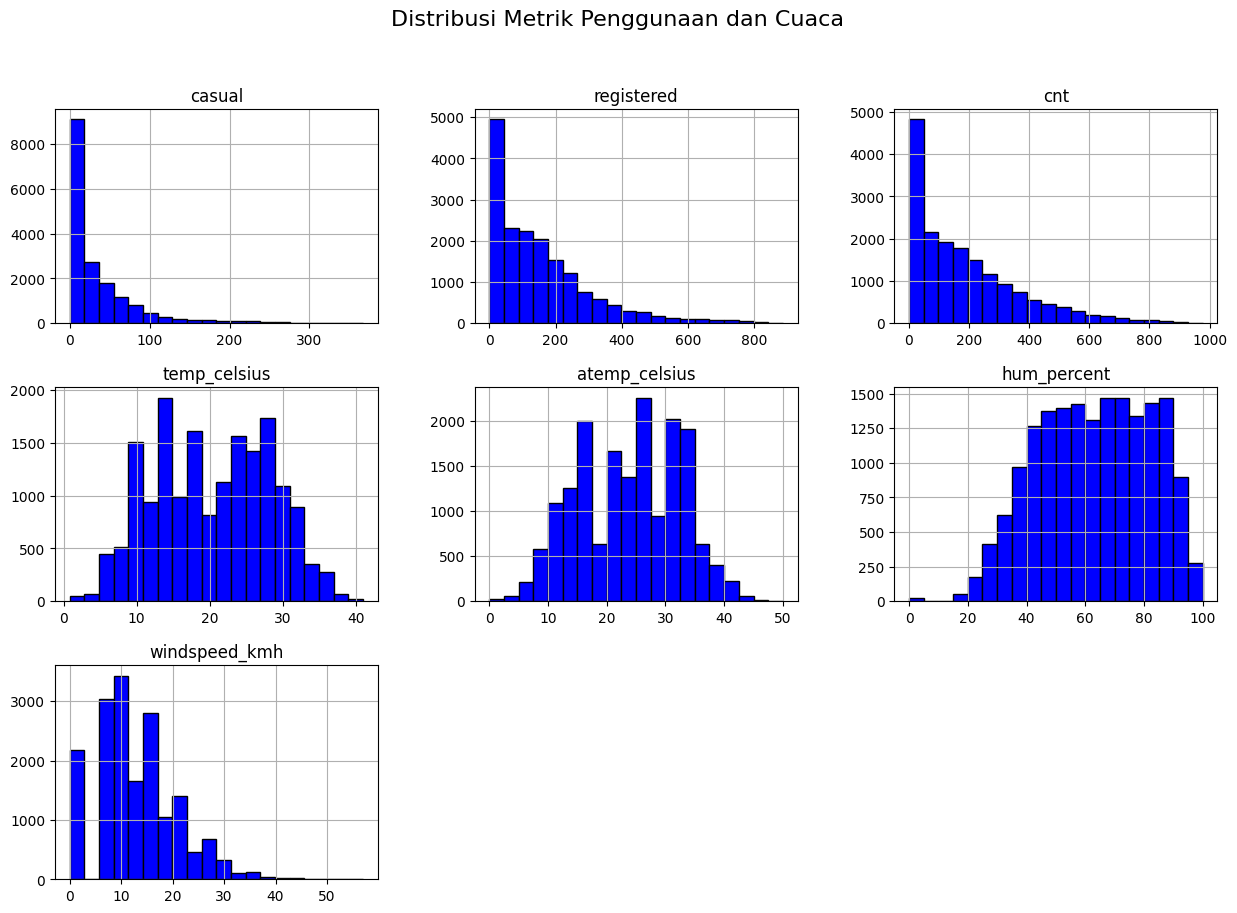

In [24]:
# melihat distribusi metrik penggunaan dan cuaca (7 kolom terakhir)
hour_df[hour_df.columns[-7:]].hist(figsize=(15, 10), bins=20, layout=(3, 3), color='blue', edgecolor='black')
plt.suptitle('Distribusi Metrik Penggunaan dan Cuaca', fontsize=16)

Seperti yang ditunjukkan pada boxplot sebelumnya metrik penggunaan memiliki right-skewed distribution yang berarti lebih banyak waktu (jam) yang dimana penggunanya sedikit. Walaupun terdapat waktu-waktu dimana penggunaannya sangat tinggi (sisi kanan pada tiap histogram).

Sementara itu metrik cuaca menunjukkan distribusi yang sedikit berbeda antara satu dan yang lain.

- Temperatur menunjukkan distribusi normal yang hampir simetris, tentu dikarenakan naik turunnya suhu sepanjang musim/tahun
- Kelembaban menunjukkan sedikit distribusi left-skew yang menunjukkan kelembaban tinggi sepanjang tahun sedikit lebih banyak
- Kecepatan angin menunjukkan distribusi right-skew dengan banyak outlier (ditunjukkan pada grafik sebelumnya). Ini menunjukkan kecepatan angin walaupun lebih sering berkecepatan lebih rendah, pola nya tidak menentu. 

In [25]:
corr_df = hour_df.copy()
corr_df.drop(columns=['instant', 'dteday', 'temp', 'atemp', 'hum', 'windspeed'], inplace=True)

corr_df.season = corr_df.season.map({'spring': 1, 'summer': 2, 'fall': 3, 'winter': 4})
corr_df.weekday = corr_df.weekday.map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
                      'Friday': 4, 'Saturday': 5, 'Sunday': 6})

corr_df.corr().style.background_gradient(cmap='coolwarm', axis=None)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temp_celsius,atemp_celsius,hum_percent,windspeed_kmh
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.120206,0.174226,0.178056,0.312025,0.319380,0.150625,-0.149773
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.142779,0.253684,0.250495,0.040913,0.039222,-0.083546,-0.008740
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.068457,0.122273,0.120638,0.201691,0.208096,0.164411,-0.135386
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.301202,0.374141,0.394071,0.137603,0.133750,-0.276498,0.137252
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,0.031564,-0.047345,-0.030927,-0.027340,-0.030973,-0.010588,0.003988
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,0.032721,0.021578,0.026900,-0.001795,-0.008821,-0.037158,0.011502
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,-0.300942,0.134326,0.030284,0.055390,0.054667,0.015688,-0.011830
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.152628,-0.120966,-0.142426,-0.102640,-0.105563,0.418130,0.026226
casual,0.120206,0.142779,0.068457,0.301202,0.031564,0.032721,-0.300942,-0.152628,1.000000,0.506618,0.694564,0.459616,0.454080,-0.347028,0.090287
registered,0.174226,0.253684,0.122273,0.374141,-0.047345,0.021578,0.134326,-0.120966,0.506618,1.000000,0.972151,0.335361,0.332559,-0.273933,0.082321


Berdasarkan correlation map diatas didapat tingkat hubungan antara variabel. 

Pola penyewaan:

- **Pengguna terdaftar (registered) vs total penyewaan (cnt)**: Memiliki korelasi tinggi (0.972) menunjukkan pengguna terdaftar mendominasi total penyewaan
- **Pengguna kasual (casual) vs total penyewaan**: Memiliki korelasi yang kuat tapi lebih rendah (0.695) mendukung pernyataan diatas.

Efek cuaca:

- **Temperatur vs total penyewaan**: Memiliki korelasi positif sedang (0.4) untuk temperatur sebenarnya dan temperatur "terasa seperti"
- **Kelembaban (hum_percent) vs total penyewaan**: Memiliki korelasi negatif sedang (-0.322) menunjukkan semakin tinggi kelembababan semakin rendah total penyewaan
- **Situasi cuaca (weathersit) vs total penyewaan**: Memiliki korelasi negatif rendah (-0.132) menunjukkan cuaca buruk mengurangi jumlah penyewaan. Nilai weathersit memiliki rentang 1-4 dengan 4 berarti cuaca buruk.
- **Kecepatan angin (windspeed_kmh) vs total penyewaan**: Memiliki korelasi positif rendah (0.093) menunjukkan kecepatan angin sangat sedikit atau tidak berkorelasi dalam mempengaruhi jumlah penyewaan

Pola waktu:

- **Jam dalam hari (hr) vs total penyewaan**: Memiliki korelasi positif sedang (0.394). Ini dapat diduga karena pengguna memang pada umumnya menggunakan di jam aktif (jam 6 pagi keatas)
- **Tahun (yr) vs total penyewaan**: Memiliki korelasi positif sedang (0.250) menunjukkan kenaikan penyewaan sepeda pada tahun 2011-2012
- **Musim (season) vs total penyewaan**: Memiliki korelasi positif rendah (0.178) menunjukkan variasi jumlah penyewaan dalam setiap musimnya

Perbedaan pengguna (kasual vs terdaftar):

- **Hari kerja (workingday)**: Memiliki efek yang berlawanan (0.134 untuk terdaftar dan -0.301 untuk kasual) -- menunjukkan pengguna terdaftar menyewa lebih banyak daripada pengguna kasual pada hari kerja.
- **Hari libur (holiday)**: Memiliki sedikit efek yang berlawanan (0.032 untuk kasual dan -0.047 untuk terdaftar) -- mendukung pernyataan diatas.

### Mengeksplor Data Lebih Lanjut dengan Pivoting

In [70]:
# kelompokkan berdasarkan musim dan analisa rata-rata penyewaan terhadap rentang temperatur
# karena temperatur bertipe kontinu, buat bin agar dapat dikelompokkan
hour_df['temp_bin'] = pd.cut(hour_df['temp_celsius'],
                             bins=[0, 10, 20, 30, 40],
                             labels=['0-10°C', '10-20°C', '20-30°C', '30-40°C'])

# kelompokkan berdasarkan bin
season_temp_analysis = hour_df.groupby(['season', 'temp_bin'], observed=True).agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
})

# rasio tipe pengguna terhadap total pengguna
season_temp_analysis['casual_ratio'] = season_temp_analysis['casual'] / season_temp_analysis['cnt'] * 100
season_temp_analysis['registered_ratio'] = season_temp_analysis['registered'] / season_temp_analysis['cnt'] * 100

season_temp_analysis

cnt     casual  registered  casual_ratio  \
season temp_bin                                                    
fall   10-20°C   100.037037  12.240741   87.796296     12.236209   
       20-30°C   181.930766  33.074417  148.856350     18.179672   
       30-40°C   324.036228  78.155262  245.880966     24.119297   
spring 0-10°C     67.077482   4.111985   62.965496      6.130203   
       10-20°C   122.995654  16.433290  106.562364     13.360870   
       20-30°C   268.245675  55.418685  212.826990     20.659675   
summer 0-10°C     54.341772   4.721519   49.620253      8.688563   
       10-20°C   127.830954  22.194591  105.636364     17.362454   
       20-30°C   234.943518  53.112585  181.830933     22.606534   
       30-40°C   344.520776  92.789474  251.731302     26.932911   
winter 0-10°C     91.475177   4.251773   87.223404      4.648007   
       10-20°C   171.861977  21.055133  150.806844     12.251188   
       20-30°C   274.001530  55.288447  218.713083     20.178153   
       30-40°C   438.461538  72.769231  365.692308     16.596491   

                 registered_ratio  
season temp_bin                    
fall   10-20°C          87.763791  
       20-30°C          81.820328  
       30-40°C          75.880703  
spring 0-10°C           93.869797  
       10-20°C          86.639130  
       20-30°C          79.340325  
summer 0-10°C           91.311437  
       10-20°C          82.637546  
       20-30°C          77.393466  
       30-40°C          73.067089  
winter 0-10°C           95.351993  
       10-20°C          87.748812  
       20-30°C          79.821847  
       30-40°C          83.403509

Dari tabel didapat bahwa dari setiap musim, temperatur yang lebih tinggi meningkatkan penyewaan sepeda. Dari rasio pengguna juga terlihat sensitivitas pengguna terhadap cuaca. Pengguna kasual pada musim panas (summer) dengan suhu tinggi (30-40°C) memiliki rasio 27%, sementara pada musim dingin (winter) suhu rendah (0-10°C) memiliki rasio hanya sekitar 5%.

In [43]:
# berlaku juga untuk kelembababan
hour_df['humidity_bin'] = pd.cut(hour_df['hum_percent'],
                                bins=[0, 25, 50, 75, 100],
                                labels=['0-25%', '25-50%', '50-75%', '75-100%'])

season_humidity_analysis = hour_df.groupby(['season', 'humidity_bin'], observed=True).agg({
    'cnt': 'mean'
})

season_humidity_analysis

cnt
season humidity_bin            
fall   0-25%         376.722222
       25-50%        352.326803
       50-75%        237.838803
       75-100%       125.772332
spring 0-25%         167.010526
       25-50%        139.070891
       50-75%         95.849442
       75-100%        85.582334
summer 0-25%         355.422819
       25-50%        288.738449
       50-75%        219.813257
       75-100%       115.478702
winter 0-25%         330.857143
       25-50%        305.400433
       50-75%        202.142049
       75-100%       130.327249

In [82]:
season_weathersit_analysis = hour_df.groupby(['season', 'weathersit'], observed=True).agg({
    'cnt': 'mean'
})

season_weathersit_analysis

cnt
season weathersit            
fall   1           244.494207
       2           224.848997
       3           171.955390
spring 1           122.055535
       2           103.074689
       3            58.650407
       4            74.333333
summer 1           232.410983
       2           181.261364
       3           115.179803
winter 1           209.463779
       2           201.483974
       3           116.453333

Seperti yang dapat diduga cuaca buruk (weathersit = 3,4) menurunkan jumlah penyewaan.

In [ ]:
from IPython.display import Markdown

# kondisi cuaca yang optimal untuk penyewaan sepeda
optimal_conditions = hour_df.groupby(['season', 'temp_bin', 'humidity_bin', 'weathersit'], observed=True).agg({
    'cnt': 'mean'
}).reset_index().sort_values('cnt', ascending=False).head(5)

print("5 Kondisi terbaik untuk penyewaan sepeda:")
display(Markdown(optimal_conditions.to_markdown(index=False, headers=['Musim', 'Bin Temperatur', 'Bin Kelembaban', 'Situasi Cuaca', 'Rata-rata Penyewaan'])))

5 Kondisi terbaik untuk penyewaan sepeda:


| Musim   | Bin Temperatur   | Bin Kelembaban   |   Situasi Cuaca |   Rata-rata Penyewaan |
|:--------|:-----------------|:-----------------|----------------:|----------------------:|
| winter  | 20-30°C          | 25-50%           |               3 |               508     |
| summer  | 30-40°C          | 25-50%           |               3 |               501     |
| winter  | 10-20°C          | 25-50%           |               3 |               501     |
| winter  | 30-40°C          | 25-50%           |               1 |               498.333 |
| fall    | 30-40°C          | 0-25%            |               2 |               464     |

Didapat hasil yang sedikit *counterintuitive*. Situasi cuaca yang buruk (3)--Salju Ringan, Hujan Ringan + Badai Petir + Awan yang tersebar, Hujan Ringan + Awan yang tersebar--menjadi 3 kondisi terbaik teratas dalam menyewa sepeda.

In [ ]:
# hitung jumlah kejadian untuk setiap kombinasi kondisi cuaca
condition_counts = hour_df.groupby(['season', 'temp_bin', 'humidity_bin', 'weathersit'],
                                  observed=True).size().reset_index(name='count')

# dapatkan jumlah kejadian untuk 5 kondisi teratas yang telah diidentifikasi sebelumnya
top_condition_counts = pd.merge(
    optimal_conditions,
    condition_counts,
    on=['season', 'temp_bin', 'humidity_bin', 'weathersit'],
    how='left'
)

print("Jumlah kejadian untuk 5 kondisi terbaik:")
top_condition_counts

Jumlah kejadian untuk 5 kondisi terbaik:


,season,temp_bin,humidity_bin,weathersit,cnt,count
0,winter,20-30°C,25-50%,3,508.000000,1
1,summer,30-40°C,25-50%,3,501.000000,2
2,winter,10-20°C,25-50%,3,501.000000,2
3,winter,30-40°C,25-50%,1,498.333333,9
4,fall,30-40°C,0-25%,2,464.000000,2



Kondisi #115: winter season, 20-30°C, 25-50%, weathersit=3
Jumlah kejadian: 1
Min: 508.0, Max: 508.0, Mean: 508.00, Median: 508.0
Jumlah outlier: 0 (0.0% dari grup)

Distribusi jam penyewaan sepeda:
hr
19    1
Name: count, dtype: int64
====

Kondisi #89: summer season, 30-40°C, 25-50%, weathersit=3
Jumlah kejadian: 2
Min: 450.0, Max: 552.0, Mean: 501.00, Median: 501.0
Jumlah outlier: 0 (0.0% dari grup)

Distribusi jam penyewaan sepeda:
hr
17    1
18    1
Name: count, dtype: int64
====

Kondisi #106: winter season, 10-20°C, 25-50%, weathersit=3
Jumlah kejadian: 2
Min: 313.0, Max: 689.0, Mean: 501.00, Median: 501.0
Jumlah outlier: 0 (0.0% dari grup)

Distribusi jam penyewaan sepeda:
hr
12    1
17    1
Name: count, dtype: int64
====

Kondisi #122: winter season, 30-40°C, 25-50%, weathersit=1
Jumlah kejadian: 9
Min: 277.0, Max: 953.0, Mean: 498.33, Median: 400.0
Jumlah outlier: 2 (22.2% dari grup)

Distribusi jam penyewaan sepeda:
hr
14    4
15    1
16    2
17    1
18    1
Name: count, dt

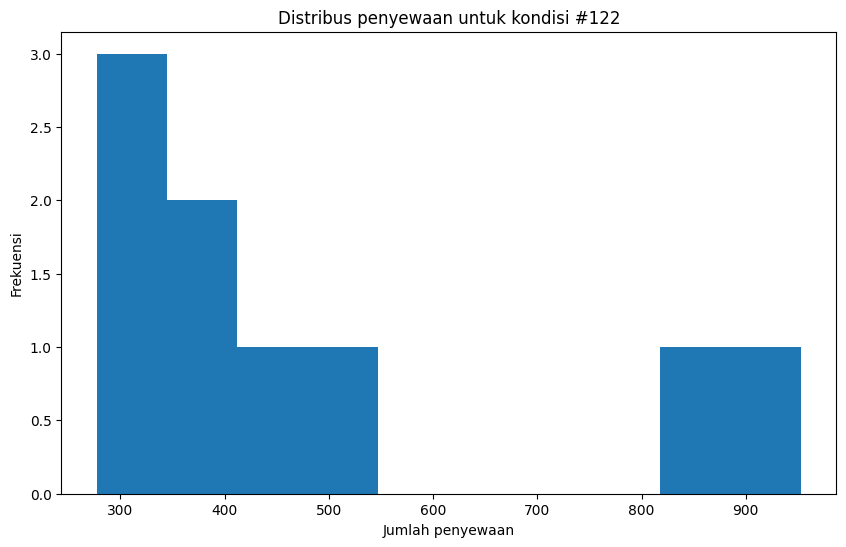


Kondisi #16: fall season, 30-40°C, 0-25%, weathersit=2
Jumlah kejadian: 2
Min: 401.0, Max: 527.0, Mean: 464.00, Median: 464.0
Jumlah outlier: 0 (0.0% dari grup)

Distribusi jam penyewaan sepeda:
hr
15    1
16    1
Name: count, dtype: int64
====


In [ ]:
# analisis setiap kondisi teratas untuk outlier
for idx, row in optimal_conditions.iterrows():
    condition_data = hour_df[(hour_df['season'] == row['season']) &
                           (hour_df['temp_bin'] == row['temp_bin']) &
                           (hour_df['humidity_bin'] == row['humidity_bin']) &
                           (hour_df['weathersit'] == row['weathersit'])]

    # jika data tersedia
    if len(condition_data) > 0:
        print(f"\nKondisi #{idx+1}: {row['season']} season, {row['temp_bin']}, {row['humidity_bin']}, weathersit={row['weathersit']}")
        print(f"Jumlah kejadian: {len(condition_data)}")

        # statistik deskriptif
        stats = condition_data['cnt'].describe()
        print(f"Min: {stats['min']}, Max: {stats['max']}, Mean: {stats['mean']:.2f}, Median: {stats['50%']}")

        # cek outlier
        q1 = condition_data['cnt'].quantile(0.25)
        q3 = condition_data['cnt'].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr

        outliers = condition_data[condition_data['cnt'] > upper_bound]
        print(f'Jumlah outlier: {len(outliers)} ({len(outliers)/len(condition_data)*100:.1f}% dari grup)')

        # cek distribusi jam
        print("\nDistribusi jam penyewaan sepeda:")
        hour_counts = condition_data['hr'].value_counts().sort_index()
        print(hour_counts)
        print("====")

        # plot jika ada cukup data untuk ditampilkan
        if len(condition_data) >= 5:
            plt.figure(figsize=(10, 6))
            plt.hist(condition_data['cnt'], bins=10)
            plt.title(f"Distribus penyewaan untuk kondisi #{idx+1}")
            plt.xlabel("Jumlah penyewaan")
            plt.ylabel("Frekuensi")
            plt.show()

"Kondisi optimal" yang dibuat hanya berdasar pada sampel data yang sangat kecil:

- Kondisi #115 (winter, 20-30°C, 25-50%, weathersit=3): **Hanya memiliki 1 data point**
  - Hanya 1 waktu (19 atau 7 PM) dengan 508 penyewaan
  - Tidak boleh dianggap sebagai rata-rata
- Kondisi #89 (summer, 30-40°C, 25-50%, weathersit=3): **Hanya memiliki 2 data point**
  - Hanya di jam sibuk (17 & 18)
  - Rentang nya sangat jauh (450 ke 522 penyewaan)
- Kondisi #106 (winter, 10-20°C, 25-50%, weathersit=3): **Hanya memiliki 2 data point**
  - Waktu yang sangat berbeda (12 & 17)
  - Rentang yang lebih besar (313 ke 689 penyewaan)

Selain itu, "kondisi optimal" ini hanya terjadi pada jam sibuk sehingga berkontribusi pada tingginya penyewaan terlepas dari kondisi cuaca. Sehingga pencarian kondisi optimal perlu dilakukan dengan mempertimbangkan minimal data point dan kondisi jam sibuk.

In [ ]:
MIN_SAMPLE_SIZE = 10

# hitung rata-rata penyewaan berdasarkan jam
hourly_baseline = hour_df.groupby('hr', observed=True)['cnt'].mean().reset_index()
hourly_baseline.rename(columns={'cnt': 'baseline_cnt'}, inplace=True)
hour_df_with_baseline = hour_df.merge(hourly_baseline, on='hr')

# hitung kinerja relatif dibandingkan dengan baseline
# kinerja relatif = penyewaan saat ini / penyewaan rata-rata jam
hour_df_with_baseline['relative_performance'] = hour_df_with_baseline['cnt'] / hour_df_with_baseline['baseline_cnt']

# kondisi yang baik terlepas dari waktu
relative_optimal = hour_df_with_baseline.groupby(
    ['season', 'temp_bin', 'humidity_bin', 'weathersit'],
    observed=True
).agg({'relative_performance': ['mean', 'count']}).reset_index()

# filter data yang memiliki lebih dari minimum sampel
relative_optimal = relative_optimal[relative_optimal[('relative_performance', 'count')] >= MIN_SAMPLE_SIZE]

# urutkan data berdasarkan kinerja relatif (rerata)
relative_best = relative_optimal.sort_values(('relative_performance', 'mean'), ascending=False).head(5)

print("Kondisi terbaik terhadap kinerja relatif (dibandingkan terhadap pola per jam):")
display(Markdown(
    relative_best.to_markdown(
        index=False,
        headers=['Musim', 'Temperatur', 'Kelembaban', 'Situasi Cuaca', 'Rerata Kinerja Relatif', 'Jumlah Kinerja Relatif']
    )
))

Kondisi terbaik terhadap kinerja relatif (dibandingkan terhadap pola per jam):


| Musim   | Temperatur   | Kelembaban   |   Situasi Cuaca |   Rerata Kinerja Relatif |   Jumlah Kinerja Relatif |
|:--------|:-------------|:-------------|----------------:|-------------------------:|-------------------------:|
| fall    | 10-20°C      | 75-100%      |               1 |                  1.84822 |                       19 |
| winter  | 20-30°C      | 25-50%       |               1 |                  1.47358 |                      279 |
| fall    | 20-30°C      | 25-50%       |               1 |                  1.45775 |                      252 |
| fall    | 20-30°C      | 25-50%       |               2 |                  1.45069 |                       26 |
| summer  | 20-30°C      | 0-25%        |               1 |                  1.44767 |                       78 |

Berdasarkan tabel, musim gugur dengan temperatur 10-20°C, kelembaban tinggi, dan cuaca cerah menunjukkan performa terbaik sebagai kondisi terbaik dalam menyewa sepeda. Situasi cuaca 1 (=Cerah, Sebagian berawan) mengonfirmasi keadaan yang baik untuk menyewa sepeda. Temperatur sedang (20-30°) menjadi temperatur pilihan dari setiap musim.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan kondisi cuaca mempengaruhi pola penyewaan sepeda sepanjang musim pada 2011-2012?

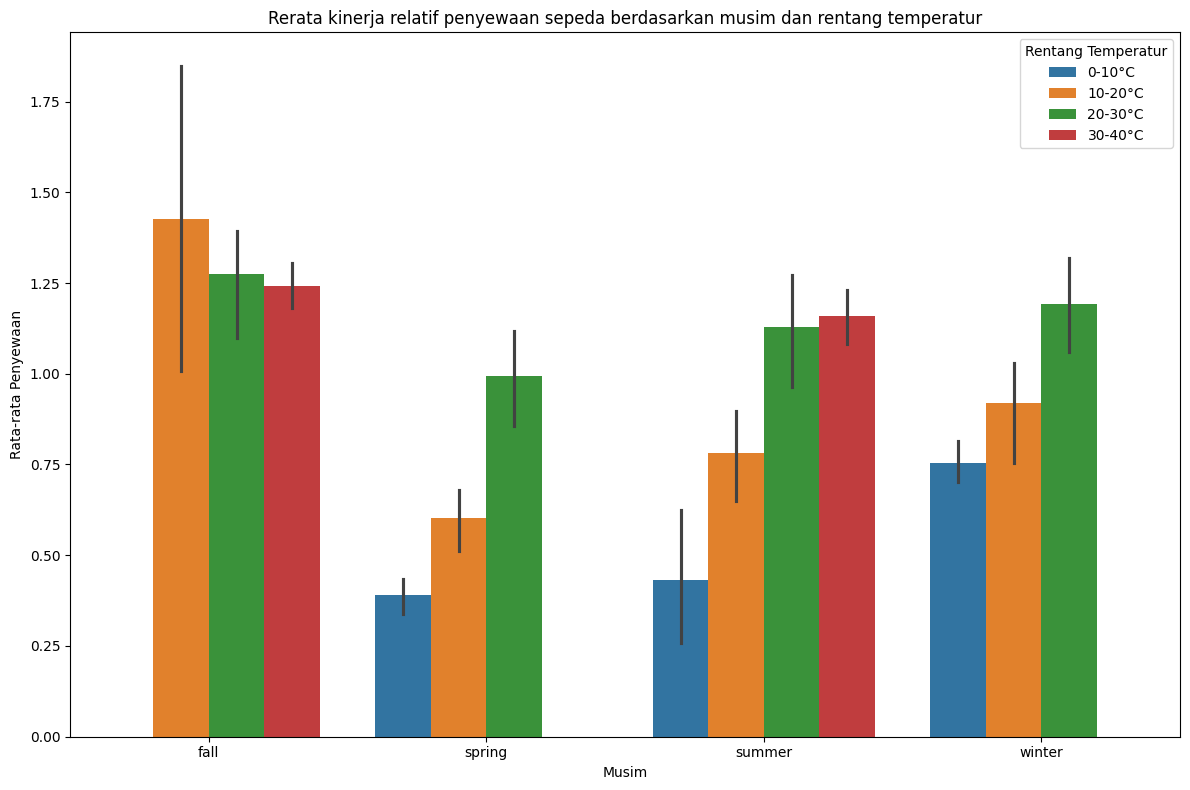

In [123]:
plt.figure(figsize=(12, 8))
sns.barplot(x='season', y=('relative_performance', 'mean'),
            hue='temp_bin',
            data=relative_optimal.reset_index())
plt.title('Rerata kinerja relatif penyewaan sepeda berdasarkan musim dan rentang temperatur')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=0)
plt.legend(title='Rentang Temperatur')
plt.tight_layout()
plt.show()

Dari grafik dapat dilihat bahwa temperatur sedang (20-30°) memiliki kinerja baik dalam setiap musim. Sementara seperti yang dapat diduga suhu rendah memiliki kinerja yang kurang terutama pada musim gugur (fall) dan musim (semi). Namun demikian, musim gugur memiliki kinerja terbaik dari musim-musim yang lain.

Selain itu kinerja musim dingin tidak seburuk yang diduga. Hari-hari hangat pada musim dingin (20-30°C) memingkatkan kinerja penyewaan. Sementara musim semi memiliki kinerja yang rendah.

Dari grafik ini dapat disarankan bahwa marketing dan promosi dilakukan sepanjang musim gugur serta hari-hari dimana temperatur sedang (20-30°), sementara memberi hadiah seperti menawarkan insentif selama musim dan hari-hari yang berkinerja rendah seperti hari dingin pada musim semi.

### Pertanyaan 2: Apa perbedaan utama antara pola penggunaan pengguna terdaftar dan kasual selama hari kerja vs akhir pekan pada tahun 2011-2012?

In [155]:
# buat kolom baru untuk menandakan akhir pekan atau tidak
hour_df['is_weekend'] = hour_df['weekday'].isin(['Saturday', 'Sunday'])

# kelompokkan menjadi berdasarkan jam dan akhir pekan
hourly_usage = hour_df.groupby(['hr', 'is_weekend'], observed=True).agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()

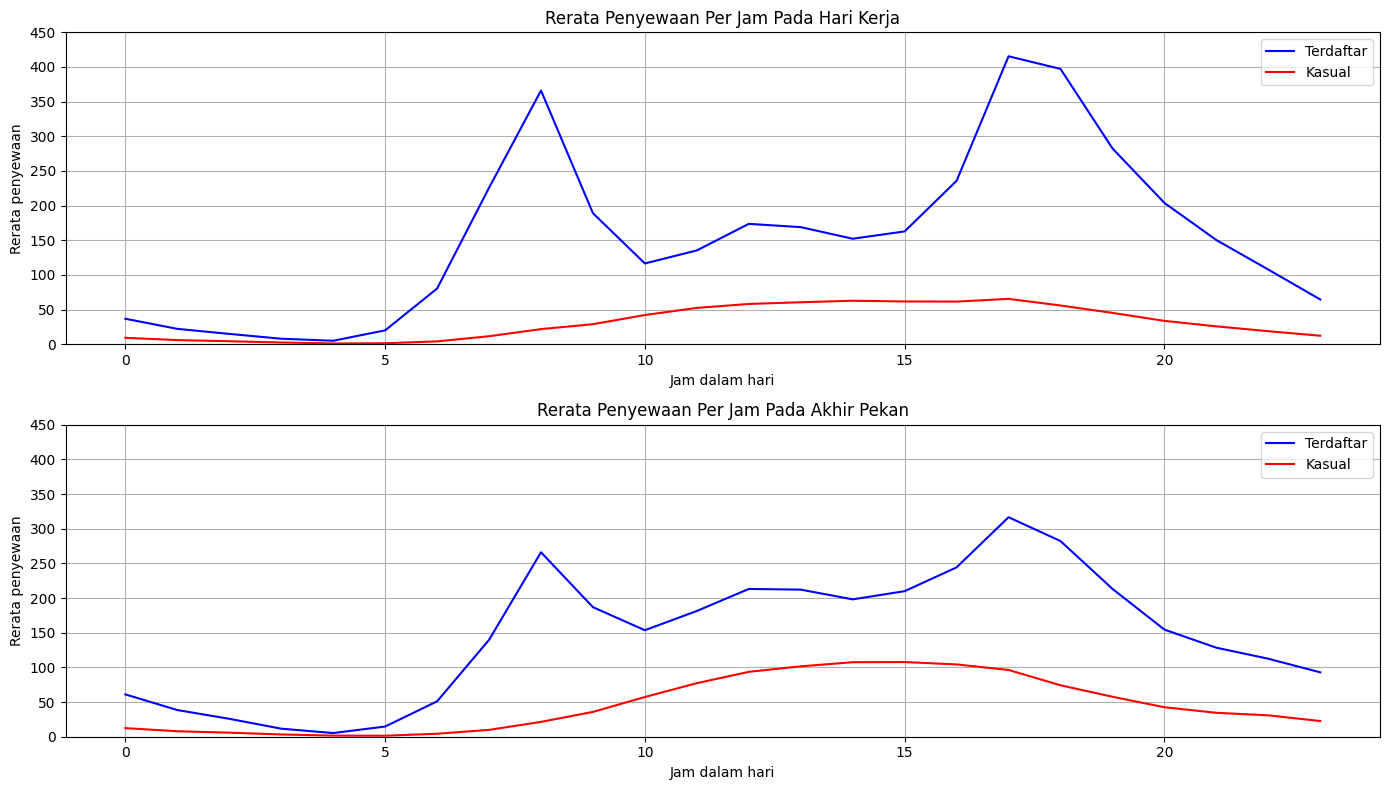

In [156]:
# hitung rasio pengguna kasual terhadap pengguna terdaftar
hourly_usage['casual_to_registered_ratio'] = hourly_usage['casual'] / hourly_usage['registered']

plt.figure(figsize=(14, 8))

weekday_data = hourly_usage[~hourly_usage['is_weekend']]
weekend_data = hourly_usage[hourly_usage['is_weekend']]

plt.subplot(2, 1, 1)
plt.plot(weekday_data['hr'], weekday_data['registered'], 'b-', label='Terdaftar')
plt.plot(weekday_data['hr'], weekday_data['casual'], 'r-', label='Kasual')
plt.ylim(0, 450)
plt.title('Rerata Penyewaan Per Jam Pada Hari Kerja')
plt.xlabel('Jam dalam hari')
plt.ylabel('Rerata penyewaan')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(weekend_data['hr'], weekend_data['registered'], 'b-', label='Terdaftar')
plt.plot(weekend_data['hr'], weekend_data['casual'], 'r-', label='Kasual')
plt.ylim(0, 450)
plt.title('Rerata Penyewaan Per Jam Pada Akhir Pekan')
plt.xlabel('Jam dalam hari')
plt.ylabel('Rerata penyewaan')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Pengguna terdaftar secara umum memiliki jumlah penyewaan yang lebih banyak dibanding pengguna kasual. Baik pada hari kerja maupun pada akhir pekan terjadi peningkatan penyewaan oleh pengguna terdaftar sekitar pukul 7-8 dan 17-18 yang menunjukkan jam sibuk dan penurunan penyewaan pada tengah hari. Sementara pengguna kasual kenaikan penyewaan terjadi dengan grafik halus sekitar pukul 10-19.

Selain itu pengguna terdaftar memiliki penyewaan yang lebih rendah pada akhir pekan dibanding hari kerja, sementara pengguna kasual sebaliknya, penggunaan lebih rendah pada hari kerja dibanding akhir pekan. Ini menunjukkan pengguna terdaftar menggunakan penyewaan untuk perjalanan pulang pergi. Sedangkan pengguna kasual menggunakan penyewaan sepeda untuk tujuan jalan-jalan/rekreasi/dsb.

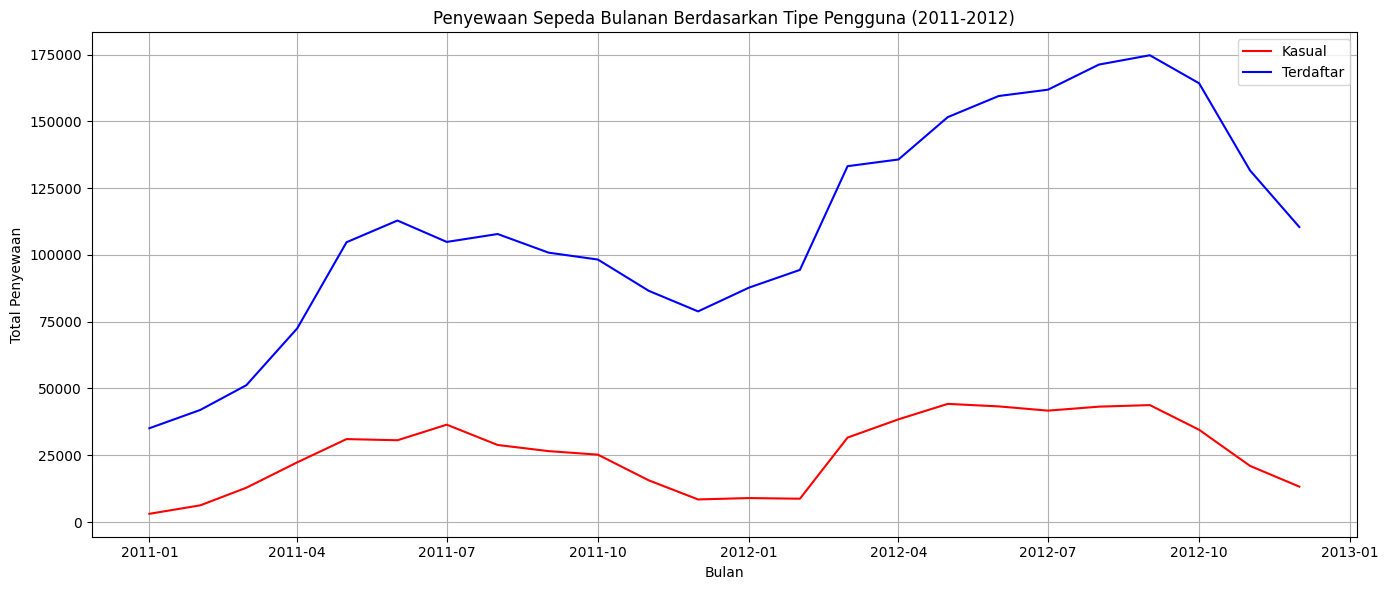

In [131]:
hour_df['month'] = hour_df['dteday'].dt.month
hour_df['year'] = hour_df['dteday'].dt.year

# tren bulanan terhadap tipe pengguna
monthly_trends = hour_df.groupby(['year', 'month']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

# buat time series untuk plot
monthly_trends['date'] = pd.to_datetime(monthly_trends[['year', 'month']].assign(day=1))

plt.figure(figsize=(14, 6))
plt.plot(monthly_trends['date'], monthly_trends['casual'], 'r-', label='Kasual')
plt.plot(monthly_trends['date'], monthly_trends['registered'], 'b-', label='Terdaftar')
plt.title('Penyewaan Sepeda Bulanan Berdasarkan Tipe Pengguna (2011-2012)')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Dari grafik dapat dilihat pengguna terdaftar memiliki perkembangan yang signikan antar tahun sementara pengguna kasual menunjukkan peningkatan yang kecil. Keduanya memiliki puncak tinggi saat memasuki bulan-bulan musim panas (Juni-Agustus) dan penurunan pada bulan-bulan musim dingin (Desember-Januari)

## Analisis Lanjutan

### Apa batasan cuaca (suhu, kelembaban, kecepatan angin) yang membuat jumlah penyewaan menurun dibanding kondisi optimal?

In [146]:
temp_impact_relative = hour_df_with_baseline.groupby('temp_celsius', observed=True).agg({
    'relative_performance': ['mean', 'count']
}).reset_index()

hum_impact_relative = hour_df_with_baseline.groupby('hum_percent', observed=True).agg({
    'relative_performance': ['mean', 'count']
}).reset_index()

# filter dengan hanya mengambil data dengan lebih dari 10 sampel
temp_impact_relative = temp_impact_relative[temp_impact_relative[('relative_performance', 'count')] >= 10]
hum_impact_relative = hum_impact_relative[hum_impact_relative[('relative_performance', 'count')] >= 10]

# optimal temperatur berdasarkan kinerja relatif
optimal_temp_relative = temp_impact_relative.loc[temp_impact_relative[('relative_performance', 'mean')].idxmax(), 'temp_celsius']
optimal_hum_relative = hum_impact_relative.loc[hum_impact_relative[('relative_performance', 'mean')].idxmax(), 'hum_percent']
print(f"Temperatur optimal untuk penyewaan sepeda: {optimal_temp_relative.iloc[0]:.1f}°C")
print(f"Kelembaban optimal untuk penyewaan sepeda: {optimal_hum_relative.iloc[0]}%")
print("Karena kecepatan angin memiliki pengaruh yang tidak menentu maka tidak ada nilai optimal")

Temperatur optimal untuk penyewaan sepeda: 31.2°C
Kelembaban optimal untuk penyewaan sepeda: 89.0%
Karena kecepatan angin memiliki pengaruh yang tidak menentu maka tidak ada nilai optimal


### Periode waktu mana yang menunjukkan kesempatan bagus untuk mengajak pengguna kasual untuk mendaftar?

In [ ]:
# kelompokkan berdasarkan musim harian dan jam
conversion_opportunities = hour_df.groupby(['season', 'weekday', 'hr'], observed=True).agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# hitung rasio pengguna kasual terhadap total pengguna
conversion_opportunities['casual_ratio'] = conversion_opportunities['casual'] / (conversion_opportunities['casual'] + conversion_opportunities['registered'])

# kesempatan tertinggi untuk mengonversi pengguna kasual menjadi terdaftar
# yaitu waktu dengan rasio pengguna kasual yang tinggi
top_opportunities = conversion_opportunities.sort_values('casual_ratio', ascending=False).head(10)

print("Kesempatan terbaik untuk mengajak pengguna kasual mendaftar:")
display(
    Markdown(
        top_opportunities[[
            'season',
            'weekday',
            'hr',
            'casual',
            'registered',
            'casual_ratio'
        ]].to_markdown(index=False, tablefmt='github',
                       headers=['Musim', 'Hari', 'Jam', 'Pengguna Kasual', 'Pengguna Terdaftar', 'Rasio Kasual'])
    )
)

Kesempatan terbaik untuk mengajak pengguna kasual mendaftar:


| Musim   | Hari   |   Jam |   Pengguna Kasual |   Pengguna Terdaftar |   Rasio Kasual |
|---------|--------|-------|-------------------|----------------------|----------------|
| summer  | Sunday |    15 |           199.077 |              247     |       0.446284 |
| summer  | Sunday |    17 |           177.269 |              226.769 |       0.438743 |
| summer  | Monday |    14 |           186.154 |              238.154 |       0.438724 |
| summer  | Sunday |    16 |           190.231 |              244.038 |       0.438048 |
| summer  | Monday |    15 |           182.923 |              235.308 |       0.437374 |
| summer  | Sunday |    14 |           189.154 |              246.692 |       0.433992 |
| summer  | Sunday |    13 |           192.154 |              254.923 |       0.4298   |
| summer  | Monday |    13 |           186.385 |              252.885 |       0.424306 |
| fall    | Sunday |    15 |           177.296 |              245.704 |       0.41914  |
| fall    | Sunday |    16 |           168.667 |              237.148 |       0.415625 |

## Conclusion

### Pertanyaan 1: Bagaimana perbedaan kondisi cuaca mempengaruhi pola penyewaan sepeda sepanjang musim pada 2011-2012?

Analisis menunjukkan bahwa kondisi cuaca memiliki pengaruh signifikan terhadap pola penyewaan sepeda:

- **Temperatur** adalah faktor cuaca paling berpengaruh dengan korelasi positif sedang (0.4), dengan temperatur optimal untuk penyewaan sekitar 25°C. Setiap musim menunjukkan peningkatan penyewaan pada temperatur yang lebih tinggi dalam rentang musim tersebut.

- **Kelembaban** berkorelasi negatif (-0.322) dengan jumlah penyewaan, menunjukkan kelembaban tinggi cenderung mengurangi minat penyewaan sepeda.

- **Kinerja berdasarkan musim** menunjukkan musim gugur (fall) secara konsisten memiliki kinerja terbaik dari semua musim, terutama dengan temperatur 10-20°C. Temperatur sedang (20-30°C) menunjukkan kinerja yang baik di setiap musim.

- **Cuaca optimal** untuk penyewaan adalah cuaca cerah (weathersit=1) dengan temperatur moderat dan kelembaban tidak terlalu tinggi. Cuaca buruk (weathersit=3,4) secara signifikan menurunkan jumlah penyewaan.

- **Pengguna kasual lebih sensitif** terhadap kondisi cuaca dibanding pengguna terdaftar. Pada musim panas dengan suhu tinggi, rasio pengguna kasual mencapai 27%, sementara pada musim dingin dengan suhu rendah hanya sekitar 5%.

- Menariknya, hari-hari hangat pada musim dingin (20-30°C) menunjukkan kinerja penyewaan yang baik, sementara suhu rendah pada musim semi dan gugur menunjukkan kinerja paling buruk.

### Pertanyaan 2: Apa perbedaan utama antara pola penggunaan pengguna terdaftar dan kasual selama hari kerja vs akhir pekan pada tahun 2011-2012?

Perbedaan pola penggunaan sangat jelas antara kedua tipe pengguna:

- **Pengguna terdaftar** menunjukkan pola penyewaan untuk tujuan komuter/perjalanan kerja:
  - Memiliki dua puncak penyewaan pada jam sibuk (7-8 pagi dan 17-18 sore) pada hari kerja
  - Penyewaan lebih tinggi pada hari kerja dibandingkan akhir pekan
  - Berkorelasi positif dengan hari kerja (0.134) dan sedikit negatif dengan hari libur (-0.047)
  - Menunjukkan peningkatan signifikan dari 2011 ke 2012

- **Pengguna kasual** menunjukkan pola penyewaan untuk tujuan rekreasi:
  - Memiliki pola penyewaan yang lebih merata sepanjang hari (10-19) tanpa puncak jam sibuk yang jelas
  - Penyewaan lebih tinggi pada akhir pekan dibandingkan hari kerja
  - Berkorelasi negatif dengan hari kerja (-0.301) dan sedikit positif dengan hari libur (0.032)
  - Menunjukkan peningkatan lebih kecil dari 2011 ke 2012 dibandingkan pengguna terdaftar

- **Kesempatan untuk mengajak pengguna kasual mendaftar** terbaik adalah:
  - Pada akhir pekan (terutama hari Minggu) di musim panas dan gugur
  - Pada jam-jam siang hingga sore (11-15) ketika rasio pengguna kasual tertinggi
  - Fokus pada lokasi penyewaan dengan tujuan rekreasi pada hari-hari dengan cuaca cerah dan temperatur optimal (20-30°C)
  - Program konversi pengguna kasual ke terdaftar sebaiknya diprioritaskan pada periode musim panas hingga awal musim gugur saat jumlah pengguna kasual mencapai puncaknya